# Image processing

An image is a collection of *pixels*, which is abbreviation for picture elements.
A grayscale image can be represented as as two dimensional array, whose first axis corresponds to the x coordinate of the image and the second axis corresponds to the y coordinate. The array contains at each coordinate pair (x,y) a value, which is typically a float between 0.0 and 1.0, or an integer between 0 and 255. This specifies the level of grayness. For example, if the array contains value 255 at coordinates (0,0), then in the image the pixel at top left is white.

In color images there is third axis is for the red, green, and blue components of each pixel. For each of these color components there is a value between 0.1 and 1.0 (or between 0 and 255). The combinations of different values for the three components red, green, and blue can result in at least 16.7 million colors.

Since images can be represented as multidimensional arrays, we can easily process images using NumPy functions. Let's see examples of these.

In [2]:
import matplotlib.pyplot as plt
import numpy as np

(530, 920, 3)
The image consists of 487600 pixels


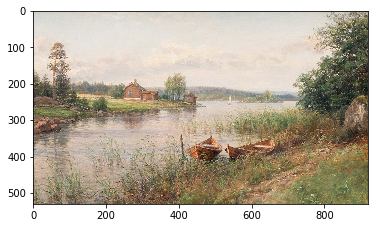

In [12]:
painting=plt.imread("painting.png")
print(painting.shape)
print("The image consists of %i pixels" % (painting.shape[0] * painting.shape[1]))
plt.imshow(painting)

Because the image is now a NumPy array, we can easily perform some operations:

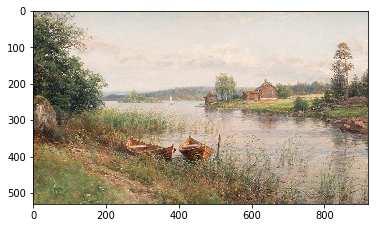

In [13]:
plt.imshow(painting[:,::-1])              # mirror the image in x direction

In the following we set the pixels on the first 30 rows white:

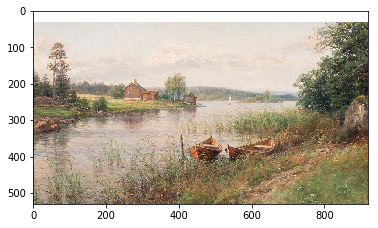

In [14]:
painting2 = painting.copy()    # don't mess the original painting!
painting2[0:30, :, :] = 1.0    # max value for all three components produces white
plt.imshow(painting2);

For a bit more complicated operation we can create a function that returns a copy of the image so that it fades to black as we move to left.

In [15]:
def fadex(image):
    height, width = image.shape[:2]
    m=np.linspace(0,1, width).reshape(1,width,1)
    result = image*m         # note that we rely on broadcasting here
    return result

(530, 920, 3)


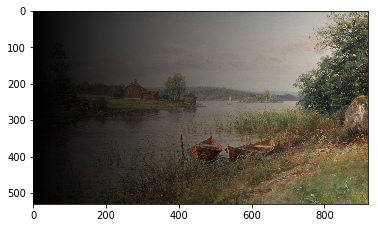

In [17]:
modified=fadex(painting)
print(modified.shape)
plt.imshow(modified)


#### <div class="alert alert-info"> Exercise X (to grayscale)</div>

Part 1.

Write a function `to_grayscale` that takes an RGB image (three dimensional array) and returns a two dimensional gray-scale image. The conversion to gray-scale should take an average of the red, green, and blue values and use that as the value of gray. The first axis is the x, the second is y, and the third is the color components (red, green, blue).

In the main function you can, for example, use the provided image `src/painting.png`. Display the grayscale image with the `plt.imshow` function. You may have to call the function `plt.gray` to set the color palette (colormap) to gray.
(See `help(plt.colormaps)` for more information about colormaps.)

Part 2.

Write functions `to_red`, `to_green`, and `to_blue` that get a three dimensional array as a parameter and return a three dimensional arrays. For instance, the function `to_red` should zero out the green and blue color components and return the result. In the `main` function create a figure with three subfigures: the top one should be the red image, the middle one the green image, and the bottom one the blue image.
<hr/>

### Finding clusters in an image

Let's first generate some data:

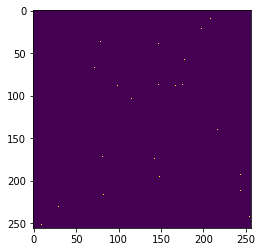

In [48]:
n=5
l=256
im = np.zeros((l,l))
np.random.seed(0)
points = np.random.randint(0, l, (2, n**2))  # sample n*n pixels from the array im
im[points[0], points[1]] = 1
plt.imshow(im);

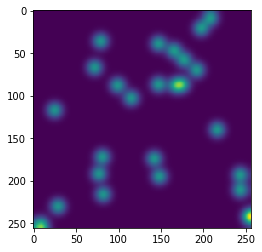

In [52]:
from scipy import ndimage
im2 = ndimage.gaussian_filter(im, sigma=l/(8.*n))  # blur the image a bit
plt.imshow(im2);

Number of clusters is 12


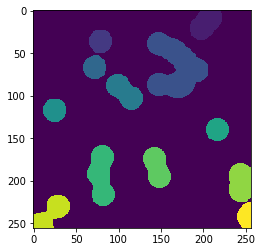

In [53]:
mask = im2 > im2.mean()     # mask those pixels whose intensity is above mean
label_im, nb_labels = ndimage.label(mask)   # connected components form clusters
print("Number of clusters is %i" % nb_labels)
plt.imshow(label_im);

Although this method we used was very simple, it could still be used for example to automatically count number of birds or stars in an image. Of course, humans can do this easily, but when there are hundreds or thousands of images, then it is better to use machines to do this mechanical work.

There is large number of applications of image processing of which we list only a few here:

* denoising
* deblurring
* image segmentation
* feature extraction
* zooming, rotating
* filtering

## Additional libraries

The are several libraries written in Python that allow easy processing of images. Few examples of these:

* [pillow](https://python-pillow.org/)
* [scikit-image](https://scikit-image.org/)
* In Scipy there is the subpackage [ndimage](https://docs.scipy.org/doc/scipy/reference/tutorial/ndimage.html) that also contains routines for processing images